In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

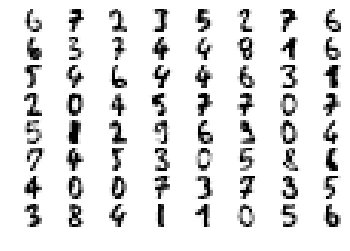

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.58497 stdev: 0.25801
Best fitness: 0.90167 - size: (2, 13) - species 5 - id 140
Average adjusted fitness: 0.519
Mean genetic distance 2.900, standard deviation 0.450
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.063 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69452 stdev: 0.25253
Best fitness: 0.90229 - size: (3, 14) - species 2 - id 348
Average adjusted fitness: 0.587
Mean genetic distance 2.994, standard deviation 0.469
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 15.426 sec (16.244 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.79177 stdev: 0.19202
Best fitness: 0.92393 - size: (3, 15) - species 20 - id 513
Average adjusted fitness: 0.692
Mean genetic distance 2.947, standard deviation 0.489
Population of 200 members in 26 spec

Mean genetic distance 3.087, standard deviation 0.488
Population of 209 members in 30 species
Total extinctions: 0
Generation time: 17.839 sec (16.123 average)
running:4/511
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.57453 stdev: 0.20463
Best fitness: 0.83983 - size: (2, 13) - species 6 - id 168
Average adjusted fitness: 0.399
Mean genetic distance 2.875, standard deviation 0.503
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 14.235 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67358 stdev: 0.18091
Best fitness: 0.85838 - size: (3, 15) - species 2 - id 326
Average adjusted fitness: 0.397
Mean genetic distance 2.983, standard deviation 0.507
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 15.431 sec (14.833 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67805 stdev: 0.18997
Best fitness: 0.87879 

Population's average fitness: 0.60734 stdev: 0.08173
Best fitness: 0.78231 - size: (5, 19) - species 10 - id 977
Average adjusted fitness: 0.216
Mean genetic distance 3.113, standard deviation 0.475
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 16.727 sec (16.220 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.55218 stdev: 0.21731
Best fitness: 0.85467 - size: (2, 13) - species 3 - id 134
Average adjusted fitness: 0.456
Mean genetic distance 2.895, standard deviation 0.501
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 14.047 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69446 stdev: 0.16804
Best fitness: 0.86147 - size: (3, 15) - species 15 - id 382
Average adjusted fitness: 0.476
Mean genetic distance 3.042, standard deviation 0.512
Population of 201 members in 30 species
Total extinctions: 0
Generation ti

Mean genetic distance 3.008, standard deviation 0.502
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 15.960 sec (14.991 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62429 stdev: 0.08005
Best fitness: 0.76623 - size: (5, 18) - species 9 - id 668
Average adjusted fitness: 0.241
Mean genetic distance 3.038, standard deviation 0.521
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 16.011 sec (15.161 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.51404 stdev: 0.14892
Best fitness: 0.77427 - size: (2, 13) - species 5 - id 125
Average adjusted fitness: 0.275
Mean genetic distance 2.930, standard deviation 0.505
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.588 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62789 stdev: 0.12525
Best fitness: 0.79406

Population's average fitness: 0.56400 stdev: 0.07027
Best fitness: 0.76376 - size: (2, 13) - species 3 - id 10
Average adjusted fitness: 0.191
Mean genetic distance 3.106, standard deviation 0.526
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 16.263 sec (15.132 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57238 stdev: 0.07134
Best fitness: 0.76376 - size: (2, 13) - species 3 - id 10
Average adjusted fitness: 0.206
Mean genetic distance 3.094, standard deviation 0.515
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 16.604 sec (15.377 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.55258 stdev: 0.20876
Best fitness: 0.82313 - size: (2, 13) - species 1 - id 114
Average adjusted fitness: 0.365
Mean genetic distance 2.849, standard deviation 0.456
Population of 200 members in 18 species
Total extinctions: 0

Mean genetic distance 3.001, standard deviation 0.478
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 15.525 sec (14.622 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58057 stdev: 0.10321
Best fitness: 0.77118 - size: (3, 16) - species 21 - id 684
Average adjusted fitness: 0.221
Mean genetic distance 3.026, standard deviation 0.468
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 15.609 sec (14.819 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59700 stdev: 0.10460
Best fitness: 0.77118 - size: (3, 16) - species 21 - id 684
Average adjusted fitness: 0.314
Mean genetic distance 3.055, standard deviation 0.472
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 16.702 sec (15.133 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.52409 stdev: 0.15373
Be

Population's average fitness: 0.55602 stdev: 0.07269
Best fitness: 0.73531 - size: (2, 13) - species 29 - id 71
Average adjusted fitness: 0.212
Mean genetic distance 3.045, standard deviation 0.475
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 16.404 sec (15.247 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56849 stdev: 0.07252
Best fitness: 0.75263 - size: (2, 15) - species 24 - id 797
Average adjusted fitness: 0.208
Mean genetic distance 3.087, standard deviation 0.476
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 16.547 sec (15.507 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56306 stdev: 0.07665
Best fitness: 0.75263 - size: (2, 15) - species 24 - id 797
Average adjusted fitness: 0.208
Mean genetic distance 3.086, standard deviation 0.485
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 17.349 sec (15.814 average)
running:

Mean genetic distance 3.119, standard deviation 0.531
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 14.867 sec (14.275 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57035 stdev: 0.07696
Best fitness: 0.75758 - size: (4, 17) - species 19 - id 470
Average adjusted fitness: 0.128
Mean genetic distance 3.132, standard deviation 0.509
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 16.136 sec (14.740 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56906 stdev: 0.08021
Best fitness: 0.75758 - size: (4, 17) - species 19 - id 470
Average adjusted fitness: 0.201
Mean genetic distance 3.203, standard deviation 0.505
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 17.294 sec (15.251 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57706 stdev: 0.08558
Best fitness: 0.75758 - size: (4, 17) - species 19 - id 470


Population's average fitness: 0.56277 stdev: 0.08518
Best fitness: 0.71614 - size: (2, 13) - species 6 - id 525
Average adjusted fitness: 0.244
Mean genetic distance 3.022, standard deviation 0.471
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 16.183 sec (15.384 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57850 stdev: 0.08034
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 525
Average adjusted fitness: 0.208
Mean genetic distance 3.064, standard deviation 0.469
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 17.256 sec (15.852 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58075 stdev: 0.08028
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 525
Average adjusted fitness: 0.207
Mean genetic distance 3.064, standard deviation 0.457
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 17.143 sec (16.110 average)

 ****** R

Mean genetic distance 3.010, standard deviation 0.477
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 17.881 sec (16.660 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58259 stdev: 0.08112
Best fitness: 0.75201 - size: (2, 13) - species 5 - id 196
Average adjusted fitness: 0.252
Mean genetic distance 3.045, standard deviation 0.479
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 17.866 sec (17.062 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59812 stdev: 0.07645
Best fitness: 0.75201 - size: (2, 13) - species 5 - id 196
Average adjusted fitness: 0.274
Mean genetic distance 3.024, standard deviation 0.481
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 22.707 sec (18.473 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60377 stdev: 0.08149
Best fitness: 0.75201 - size: (2, 13) - species 5 - id 196
Ave

Population's average fitness: 0.54185 stdev: 0.07009
Best fitness: 0.78541 - size: (2, 14) - species 9 - id 383
Average adjusted fitness: 0.238
Mean genetic distance 2.943, standard deviation 0.479
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 15.936 sec (15.229 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55260 stdev: 0.07389
Best fitness: 0.78541 - size: (2, 14) - species 9 - id 383
Average adjusted fitness: 0.285
Mean genetic distance 3.016, standard deviation 0.488
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.864 sec (15.441 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56756 stdev: 0.07549
Best fitness: 0.80519 - size: (2, 15) - species 9 - id 693
Average adjusted fitness: 0.178
Mean genetic distance 3.036, standard deviation 0.481
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 16.034 sec (15.589 average)

 ****** R

Mean genetic distance 2.884, standard deviation 0.460
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 16.047 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54264 stdev: 0.08254
Best fitness: 0.75015 - size: (2, 13) - species 8 - id 173
Average adjusted fitness: 0.237
Mean genetic distance 3.017, standard deviation 0.466
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 15.398 sec (15.723 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57091 stdev: 0.08818
Best fitness: 0.75015 - size: (2, 13) - species 8 - id 173
Average adjusted fitness: 0.197
Mean genetic distance 3.019, standard deviation 0.468
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 16.200 sec (15.882 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58589 stdev: 0.09060
Best fitness: 0.76190 - size: (3, 17) - species 14 - id 618
Average adjusted fi


 ****** Running generation 0 ****** 

Population's average fitness: 0.48583 stdev: 0.09942
Best fitness: 0.75819 - size: (2, 13) - species 3 - id 102
Average adjusted fitness: 0.228
Mean genetic distance 2.853, standard deviation 0.464
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 15.825 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54857 stdev: 0.09749
Best fitness: 0.75819 - size: (2, 13) - species 6 - id 102
Average adjusted fitness: 0.230
Mean genetic distance 2.964, standard deviation 0.510
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 17.828 sec (16.827 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57858 stdev: 0.09232
Best fitness: 0.76933 - size: (4, 15) - species 12 - id 422
Average adjusted fitness: 0.229
Mean genetic distance 3.009, standard deviation 0.477
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 17.735 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49723 stdev: 0.06690
Best fitness: 0.73284 - size: (2, 13) - species 3 - id 105
Average adjusted fitness: 0.193
Mean genetic distance 2.855, standard deviation 0.464
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 15.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53178 stdev: 0.06315
Best fitness: 0.73284 - size: (2, 13) - species 3 - id 105
Average adjusted fitness: 0.238
Mean genetic distance 2.854, standard deviation 0.472
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 15.758 sec (15.692 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55308 stdev: 0.07046
Best fitness: 0.73284 - size: (2, 13) - species 22 - id 105
Average adjusted fitness: 0.275
Mean genetic distance 2.923, standard deviation 0.497
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 16.090 sec (15.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48127 stdev: 0.09952
Best fitness: 0.76500 - size: (2, 13) - species 8 - id 48
Average adjusted fitness: 0.247
Mean genetic distance 2.937, standard deviation 0.488
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 16.232 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53805 stdev: 0.10917
Best fitness: 0.77984 - size: (2, 14) - species 8 - id 368
Average adjusted fitness: 0.257
Mean genetic distance 2.958, standard deviation 0.485
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 15.907 sec (16.069 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56001 stdev: 0.10222
Best fitness: 0.79963 - size: (4, 17) - species 8 - id 537
Average adjusted fitness: 0.243
Mean genetic distance 2.997, standard deviation 0.490
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 16.590 sec (16.24


 ****** Running generation 0 ****** 

Population's average fitness: 0.48102 stdev: 0.09170
Best fitness: 0.75139 - size: (2, 13) - species 3 - id 78
Average adjusted fitness: 0.156
Mean genetic distance 2.881, standard deviation 0.462
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 16.100 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54744 stdev: 0.09641
Best fitness: 0.80025 - size: (3, 14) - species 11 - id 216
Average adjusted fitness: 0.251
Mean genetic distance 2.966, standard deviation 0.479
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.278 sec (17.689 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56503 stdev: 0.10465
Best fitness: 0.80334 - size: (4, 17) - species 24 - id 480
Average adjusted fitness: 0.267
Mean genetic distance 2.976, standard deviation 0.471
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 17.206 sec (17.

Population's average fitness: 0.46044 stdev: 0.14581
Best fitness: 0.74583 - size: (2, 13) - species 4 - id 28
Average adjusted fitness: 0.270
Mean genetic distance 2.856, standard deviation 0.509
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 14.484 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57049 stdev: 0.13671
Best fitness: 0.74583 - size: (2, 13) - species 4 - id 28
Average adjusted fitness: 0.332
Mean genetic distance 2.983, standard deviation 0.541
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 15.366 sec (14.925 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58644 stdev: 0.13894
Best fitness: 0.78046 - size: (3, 16) - species 1 - id 509
Average adjusted fitness: 0.332
Mean genetic distance 3.050, standard deviation 0.534
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 16.232 sec (15.361 average)

 ****** Running generation 3


 ****** Running generation 0 ****** 

Population's average fitness: 0.52570 stdev: 0.09613
Best fitness: 0.74768 - size: (2, 13) - species 3 - id 31
Average adjusted fitness: 0.290
Mean genetic distance 2.952, standard deviation 0.459
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.749 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57114 stdev: 0.09429
Best fitness: 0.76252 - size: (3, 14) - species 4 - id 296
Average adjusted fitness: 0.294
Mean genetic distance 2.991, standard deviation 0.463
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 16.671 sec (15.710 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58515 stdev: 0.09603
Best fitness: 0.78293 - size: (3, 16) - species 4 - id 521
Average adjusted fitness: 0.211
Mean genetic distance 3.040, standard deviation 0.493
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 17.719 sec (16.38


 ****** Running generation 0 ****** 

Population's average fitness: 0.49589 stdev: 0.07404
Best fitness: 0.75139 - size: (2, 13) - species 3 - id 110
Average adjusted fitness: 0.218
Mean genetic distance 2.911, standard deviation 0.479
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 16.285 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54526 stdev: 0.08077
Best fitness: 0.76252 - size: (2, 12) - species 12 - id 245
Average adjusted fitness: 0.275
Mean genetic distance 3.007, standard deviation 0.481
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 18.440 sec (17.362 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56099 stdev: 0.08617
Best fitness: 0.79592 - size: (2, 13) - species 30 - id 486
Average adjusted fitness: 0.245
Mean genetic distance 3.070, standard deviation 0.509
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 20.188 sec (18


 ****** Running generation 0 ****** 

Population's average fitness: 0.50271 stdev: 0.07849
Best fitness: 0.74088 - size: (2, 13) - species 4 - id 124
Average adjusted fitness: 0.224
Mean genetic distance 2.902, standard deviation 0.450
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 21.370 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54169 stdev: 0.07353
Best fitness: 0.74088 - size: (2, 13) - species 4 - id 124
Average adjusted fitness: 0.179
Mean genetic distance 2.971, standard deviation 0.466
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 23.346 sec (22.358 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56220 stdev: 0.08567
Best fitness: 0.76500 - size: (4, 15) - species 28 - id 504
Average adjusted fitness: 0.247
Mean genetic distance 2.952, standard deviation 0.457
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 22.976 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47821 stdev: 0.09701
Best fitness: 0.74521 - size: (2, 13) - species 2 - id 76
Average adjusted fitness: 0.194
Mean genetic distance 2.935, standard deviation 0.502
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 24.760 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53777 stdev: 0.09273
Best fitness: 0.74521 - size: (2, 13) - species 2 - id 76
Average adjusted fitness: 0.184
Mean genetic distance 3.018, standard deviation 0.483
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 23.395 sec (24.078 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55588 stdev: 0.09167
Best fitness: 0.74521 - size: (2, 13) - species 2 - id 76
Average adjusted fitness: 0.192
Mean genetic distance 3.072, standard deviation 0.510
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 28.161 sec (25.439 


 ****** Running generation 0 ****** 

Population's average fitness: 0.51200 stdev: 0.07563
Best fitness: 0.80025 - size: (2, 13) - species 3 - id 64
Average adjusted fitness: 0.228
Mean genetic distance 2.902, standard deviation 0.471
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.587 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56404 stdev: 0.09798
Best fitness: 0.80519 - size: (3, 15) - species 3 - id 363
Average adjusted fitness: 0.241
Mean genetic distance 3.024, standard deviation 0.496
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 21.730 sec (20.159 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57099 stdev: 0.09780
Best fitness: 0.80519 - size: (3, 15) - species 3 - id 363
Average adjusted fitness: 0.201
Mean genetic distance 2.994, standard deviation 0.470
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 20.497 sec (20.27


 ****** Running generation 0 ****** 

Population's average fitness: 0.48675 stdev: 0.10631
Best fitness: 0.73655 - size: (2, 13) - species 2 - id 36
Average adjusted fitness: 0.199
Mean genetic distance 2.896, standard deviation 0.450
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 21.086 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55976 stdev: 0.11348
Best fitness: 0.80952 - size: (2, 13) - species 6 - id 254
Average adjusted fitness: 0.299
Mean genetic distance 3.039, standard deviation 0.465
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.746 sec (20.916 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57220 stdev: 0.11957
Best fitness: 0.82375 - size: (3, 14) - species 30 - id 542
Average adjusted fitness: 0.258
Mean genetic distance 3.053, standard deviation 0.469
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 21.798 sec (21.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.47316 stdev: 0.10310
Best fitness: 0.75572 - size: (2, 13) - species 1 - id 103
Average adjusted fitness: 0.195
Mean genetic distance 2.831, standard deviation 0.448
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.718 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54637 stdev: 0.10342
Best fitness: 0.75572 - size: (2, 13) - species 1 - id 103
Average adjusted fitness: 0.284
Mean genetic distance 2.909, standard deviation 0.469
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 19.689 sec (19.204 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57192 stdev: 0.09566
Best fitness: 0.77613 - size: (3, 15) - species 1 - id 530
Average adjusted fitness: 0.252
Mean genetic distance 2.904, standard deviation 0.484
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 25.691 sec (21.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.45487 stdev: 0.15127
Best fitness: 0.75015 - size: (2, 13) - species 1 - id 132
Average adjusted fitness: 0.235
Mean genetic distance 2.936, standard deviation 0.517
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 21.597 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58057 stdev: 0.14696
Best fitness: 0.77984 - size: (3, 15) - species 10 - id 217
Average adjusted fitness: 0.342
Mean genetic distance 3.066, standard deviation 0.529
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.151 sec (20.874 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61761 stdev: 0.14550
Best fitness: 0.78973 - size: (4, 15) - species 19 - id 530
Average adjusted fitness: 0.361
Mean genetic distance 3.087, standard deviation 0.515
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 20.361 sec (20


 ****** Running generation 0 ****** 

Population's average fitness: 0.49875 stdev: 0.06549
Best fitness: 0.68646 - size: (2, 13) - species 2 - id 59
Average adjusted fitness: 0.178
Mean genetic distance 2.891, standard deviation 0.471
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 18.636 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53328 stdev: 0.06582
Best fitness: 0.71429 - size: (2, 14) - species 1 - id 320
Average adjusted fitness: 0.228
Mean genetic distance 2.970, standard deviation 0.486
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 19.293 sec (18.965 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55814 stdev: 0.07300
Best fitness: 0.74273 - size: (3, 15) - species 9 - id 522
Average adjusted fitness: 0.239
Mean genetic distance 2.996, standard deviation 0.509
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 20.268 sec (19.39


 ****** Running generation 0 ****** 

Population's average fitness: 0.48306 stdev: 0.09294
Best fitness: 0.72480 - size: (2, 13) - species 8 - id 175
Average adjusted fitness: 0.231
Mean genetic distance 2.991, standard deviation 0.517
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.895 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54401 stdev: 0.09834
Best fitness: 0.77922 - size: (3, 16) - species 4 - id 202
Average adjusted fitness: 0.260
Mean genetic distance 3.089, standard deviation 0.527
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 19.937 sec (19.416 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58344 stdev: 0.09262
Best fitness: 0.78231 - size: (3, 15) - species 28 - id 499
Average adjusted fitness: 0.209
Mean genetic distance 3.115, standard deviation 0.505
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 21.440 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47795 stdev: 0.10186
Best fitness: 0.70810 - size: (2, 13) - species 1 - id 26
Average adjusted fitness: 0.211
Mean genetic distance 2.898, standard deviation 0.473
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 20.213 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54837 stdev: 0.09708
Best fitness: 0.74397 - size: (2, 14) - species 9 - id 378
Average adjusted fitness: 0.249
Mean genetic distance 2.998, standard deviation 0.483
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.080 sec (20.647 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57731 stdev: 0.09207
Best fitness: 0.75448 - size: (3, 15) - species 1 - id 525
Average adjusted fitness: 0.229
Mean genetic distance 3.062, standard deviation 0.487
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 22.611 sec (21.30


 ****** Running generation 0 ****** 

Population's average fitness: 0.44588 stdev: 0.13942
Best fitness: 0.76562 - size: (2, 13) - species 2 - id 109
Average adjusted fitness: 0.185
Mean genetic distance 2.878, standard deviation 0.474
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 19.564 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56300 stdev: 0.13765
Best fitness: 0.76562 - size: (2, 13) - species 4 - id 109
Average adjusted fitness: 0.277
Mean genetic distance 3.001, standard deviation 0.454
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.192 sec (20.378 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61688 stdev: 0.12877
Best fitness: 0.78788 - size: (4, 17) - species 23 - id 397
Average adjusted fitness: 0.347
Mean genetic distance 3.056, standard deviation 0.478
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 21.944 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48166 stdev: 0.09481
Best fitness: 0.72975 - size: (2, 13) - species 5 - id 176
Average adjusted fitness: 0.134
Mean genetic distance 2.849, standard deviation 0.464
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 21.234 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52991 stdev: 0.09791
Best fitness: 0.72975 - size: (3, 15) - species 1 - id 292
Average adjusted fitness: 0.157
Mean genetic distance 2.969, standard deviation 0.476
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 22.756 sec (21.995 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55712 stdev: 0.09769
Best fitness: 0.75263 - size: (3, 15) - species 4 - id 501
Average adjusted fitness: 0.217
Mean genetic distance 3.032, standard deviation 0.475
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 24.506 sec (22.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.45701 stdev: 0.15806
Best fitness: 0.80334 - size: (2, 13) - species 1 - id 131
Average adjusted fitness: 0.203
Mean genetic distance 2.892, standard deviation 0.484
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 21.455 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57433 stdev: 0.15249
Best fitness: 0.80334 - size: (2, 13) - species 1 - id 131
Average adjusted fitness: 0.322
Mean genetic distance 3.067, standard deviation 0.526
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 23.603 sec (22.529 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58713 stdev: 0.14647
Best fitness: 0.82931 - size: (3, 14) - species 19 - id 543
Average adjusted fitness: 0.277
Mean genetic distance 3.094, standard deviation 0.535
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 24.294 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45513 stdev: 0.15523
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 38
Average adjusted fitness: 0.243
Mean genetic distance 2.846, standard deviation 0.453
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.986 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55715 stdev: 0.15679
Best fitness: 0.76809 - size: (3, 15) - species 2 - id 243
Average adjusted fitness: 0.304
Mean genetic distance 2.957, standard deviation 0.437
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 23.311 sec (22.649 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59644 stdev: 0.14637
Best fitness: 0.78788 - size: (3, 14) - species 24 - id 477
Average adjusted fitness: 0.376
Mean genetic distance 2.986, standard deviation 0.451
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 25.056 sec (23.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.42135 stdev: 0.20636
Best fitness: 0.82066 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.247
Mean genetic distance 2.838, standard deviation 0.457
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 22.042 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57832 stdev: 0.20517
Best fitness: 0.84477 - size: (3, 15) - species 9 - id 324
Average adjusted fitness: 0.402
Mean genetic distance 2.862, standard deviation 0.458
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 24.368 sec (23.205 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68485 stdev: 0.17407
Best fitness: 0.85220 - size: (3, 15) - species 3 - id 506
Average adjusted fitness: 0.454
Mean genetic distance 2.976, standard deviation 0.477
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 24.580 sec (23.66


 ****** Running generation 0 ****** 

Population's average fitness: 0.51029 stdev: 0.08639
Best fitness: 0.67904 - size: (2, 13) - species 2 - id 4
Average adjusted fitness: 0.193
Mean genetic distance 2.904, standard deviation 0.461
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 22.412 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55538 stdev: 0.08712
Best fitness: 0.72604 - size: (3, 15) - species 1 - id 337
Average adjusted fitness: 0.207
Mean genetic distance 3.006, standard deviation 0.452
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 24.400 sec (23.406 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57789 stdev: 0.08111
Best fitness: 0.72975 - size: (4, 17) - species 1 - id 534
Average adjusted fitness: 0.291
Mean genetic distance 3.038, standard deviation 0.459
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 26.138 sec (24.317


 ****** Running generation 0 ****** 

Population's average fitness: 0.50635 stdev: 0.05018
Best fitness: 0.66172 - size: (2, 13) - species 5 - id 123
Average adjusted fitness: 0.191
Mean genetic distance 2.913, standard deviation 0.487
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 22.147 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53462 stdev: 0.05446
Best fitness: 0.76129 - size: (2, 13) - species 3 - id 370
Average adjusted fitness: 0.247
Mean genetic distance 3.029, standard deviation 0.486
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 27.138 sec (24.643 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54002 stdev: 0.05944
Best fitness: 0.76438 - size: (2, 14) - species 22 - id 538
Average adjusted fitness: 0.155
Mean genetic distance 2.987, standard deviation 0.493
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 24.932 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50373 stdev: 0.06378
Best fitness: 0.71985 - size: (2, 13) - species 3 - id 90
Average adjusted fitness: 0.206
Mean genetic distance 2.918, standard deviation 0.493
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 20.333 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54337 stdev: 0.06387
Best fitness: 0.73593 - size: (2, 14) - species 3 - id 348
Average adjusted fitness: 0.187
Mean genetic distance 2.969, standard deviation 0.506
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.204 sec (20.769 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55727 stdev: 0.07748
Best fitness: 0.73593 - size: (2, 14) - species 3 - id 348
Average adjusted fitness: 0.228
Mean genetic distance 3.020, standard deviation 0.508
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 21.887 sec (21.14


 ****** Running generation 0 ****** 

Population's average fitness: 0.47605 stdev: 0.08401
Best fitness: 0.65677 - size: (2, 13) - species 9 - id 117
Average adjusted fitness: 0.142
Mean genetic distance 2.788, standard deviation 0.466
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 20.777 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52238 stdev: 0.08755
Best fitness: 0.68955 - size: (3, 14) - species 1 - id 371
Average adjusted fitness: 0.203
Mean genetic distance 2.917, standard deviation 0.494
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 21.883 sec (21.330 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55975 stdev: 0.08261
Best fitness: 0.70192 - size: (3, 14) - species 7 - id 454
Average adjusted fitness: 0.200
Mean genetic distance 3.005, standard deviation 0.519
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 22.406 sec (21.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.50007 stdev: 0.06236
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 199
Average adjusted fitness: 0.213
Mean genetic distance 2.896, standard deviation 0.478
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 25.691 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52674 stdev: 0.07027
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 199
Average adjusted fitness: 0.198
Mean genetic distance 2.978, standard deviation 0.490
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 25.989 sec (25.840 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54180 stdev: 0.06717
Best fitness: 0.73717 - size: (4, 16) - species 1 - id 471
Average adjusted fitness: 0.202
Mean genetic distance 2.980, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 23.865 sec (25.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.48354 stdev: 0.08640
Best fitness: 0.74706 - size: (2, 13) - species 4 - id 64
Average adjusted fitness: 0.160
Mean genetic distance 2.935, standard deviation 0.464
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 28.865 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54343 stdev: 0.09392
Best fitness: 0.74768 - size: (2, 13) - species 1 - id 331
Average adjusted fitness: 0.260
Mean genetic distance 3.009, standard deviation 0.459
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 25.893 sec (27.379 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55761 stdev: 0.09602
Best fitness: 0.74768 - size: (2, 13) - species 8 - id 331
Average adjusted fitness: 0.293
Mean genetic distance 3.006, standard deviation 0.474
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 28.166 sec (27.64


 ****** Running generation 0 ****** 

Population's average fitness: 0.47087 stdev: 0.09475
Best fitness: 0.70625 - size: (2, 13) - species 2 - id 39
Average adjusted fitness: 0.226
Mean genetic distance 2.897, standard deviation 0.499
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 26.537 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53489 stdev: 0.10083
Best fitness: 0.75510 - size: (2, 14) - species 7 - id 254
Average adjusted fitness: 0.261
Mean genetic distance 3.052, standard deviation 0.502
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 23.479 sec (25.008 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55521 stdev: 0.09813
Best fitness: 0.75510 - size: (2, 14) - species 7 - id 254
Average adjusted fitness: 0.253
Mean genetic distance 3.118, standard deviation 0.499
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 24.375 sec (24.79


 ****** Running generation 0 ****** 

Population's average fitness: 0.45709 stdev: 0.14336
Best fitness: 0.76376 - size: (2, 13) - species 5 - id 175
Average adjusted fitness: 0.228
Mean genetic distance 2.887, standard deviation 0.432
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 25.355 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56081 stdev: 0.14111
Best fitness: 0.76376 - size: (2, 13) - species 1 - id 175
Average adjusted fitness: 0.335
Mean genetic distance 2.962, standard deviation 0.436
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 30.330 sec (27.843 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60090 stdev: 0.13029
Best fitness: 0.76871 - size: (2, 13) - species 2 - id 456
Average adjusted fitness: 0.333
Mean genetic distance 2.958, standard deviation 0.451
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 31.561 sec (29.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.49370 stdev: 0.04294
Best fitness: 0.63575 - size: (2, 13) - species 3 - id 112
Average adjusted fitness: 0.125
Mean genetic distance 2.928, standard deviation 0.498
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 29.234 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51809 stdev: 0.04780
Best fitness: 0.65244 - size: (3, 15) - species 2 - id 272
Average adjusted fitness: 0.124
Mean genetic distance 3.019, standard deviation 0.491
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 31.606 sec (30.420 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53932 stdev: 0.05511
Best fitness: 0.66605 - size: (4, 17) - species 6 - id 415
Average adjusted fitness: 0.176
Mean genetic distance 3.071, standard deviation 0.487
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 27.470 sec (29.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.48022 stdev: 0.08879
Best fitness: 0.66296 - size: (2, 13) - species 3 - id 179
Average adjusted fitness: 0.215
Mean genetic distance 2.944, standard deviation 0.458
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 21.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53782 stdev: 0.08610
Best fitness: 0.73964 - size: (2, 14) - species 10 - id 215
Average adjusted fitness: 0.204
Mean genetic distance 3.000, standard deviation 0.478
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 22.173 sec (21.779 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55470 stdev: 0.08359
Best fitness: 0.73964 - size: (2, 14) - species 10 - id 215
Average adjusted fitness: 0.185
Mean genetic distance 2.999, standard deviation 0.481
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 23.683 sec (22


 ****** Running generation 0 ****** 

Population's average fitness: 0.47580 stdev: 0.09371
Best fitness: 0.73593 - size: (2, 13) - species 7 - id 117
Average adjusted fitness: 0.187
Mean genetic distance 2.948, standard deviation 0.525
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 22.100 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53757 stdev: 0.10118
Best fitness: 0.78726 - size: (3, 14) - species 21 - id 371
Average adjusted fitness: 0.258
Mean genetic distance 3.034, standard deviation 0.507
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 23.389 sec (22.745 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55817 stdev: 0.10108
Best fitness: 0.78726 - size: (3, 14) - species 21 - id 371
Average adjusted fitness: 0.230
Mean genetic distance 3.028, standard deviation 0.512
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 22.551 sec (22


 ****** Running generation 0 ****** 

Population's average fitness: 0.46356 stdev: 0.14531
Best fitness: 0.75448 - size: (2, 13) - species 3 - id 111
Average adjusted fitness: 0.207
Mean genetic distance 2.907, standard deviation 0.471
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 23.035 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54109 stdev: 0.14932
Best fitness: 0.75448 - size: (2, 13) - species 1 - id 111
Average adjusted fitness: 0.276
Mean genetic distance 3.017, standard deviation 0.479
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 25.278 sec (24.157 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58321 stdev: 0.12513
Best fitness: 0.75448 - size: (2, 13) - species 21 - id 111
Average adjusted fitness: 0.294
Mean genetic distance 3.037, standard deviation 0.459
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 25.999 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47601 stdev: 0.08519
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 187
Average adjusted fitness: 0.174
Mean genetic distance 2.955, standard deviation 0.466
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 25.400 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52891 stdev: 0.08740
Best fitness: 0.73655 - size: (2, 14) - species 8 - id 253
Average adjusted fitness: 0.195
Mean genetic distance 3.024, standard deviation 0.477
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 25.703 sec (25.551 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55451 stdev: 0.08485
Best fitness: 0.74212 - size: (4, 16) - species 8 - id 532
Average adjusted fitness: 0.230
Mean genetic distance 3.005, standard deviation 0.482
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 27.914 sec (26.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.45523 stdev: 0.13435
Best fitness: 0.71181 - size: (2, 13) - species 5 - id 55
Average adjusted fitness: 0.194
Mean genetic distance 2.883, standard deviation 0.438
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 26.693 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55241 stdev: 0.13473
Best fitness: 0.72294 - size: (3, 15) - species 4 - id 368
Average adjusted fitness: 0.252
Mean genetic distance 3.036, standard deviation 0.477
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 32.229 sec (29.461 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57536 stdev: 0.14460
Best fitness: 0.74892 - size: (4, 17) - species 16 - id 480
Average adjusted fitness: 0.289
Mean genetic distance 3.100, standard deviation 0.463
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 38.851 sec (32.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.45727 stdev: 0.14931
Best fitness: 0.75077 - size: (2, 13) - species 3 - id 98
Average adjusted fitness: 0.236
Mean genetic distance 2.936, standard deviation 0.505
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.132 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55905 stdev: 0.14638
Best fitness: 0.75572 - size: (2, 13) - species 9 - id 242
Average adjusted fitness: 0.281
Mean genetic distance 3.030, standard deviation 0.481
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.472 sec (19.802 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59576 stdev: 0.14999
Best fitness: 0.75572 - size: (2, 13) - species 9 - id 242
Average adjusted fitness: 0.354
Mean genetic distance 3.066, standard deviation 0.488
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 21.127 sec (20.24


 ****** Running generation 0 ****** 

Population's average fitness: 0.44270 stdev: 0.20049
Best fitness: 0.81447 - size: (2, 13) - species 2 - id 20
Average adjusted fitness: 0.244
Mean genetic distance 2.914, standard deviation 0.448
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56916 stdev: 0.20859
Best fitness: 0.81447 - size: (2, 13) - species 1 - id 20
Average adjusted fitness: 0.371
Mean genetic distance 3.035, standard deviation 0.468
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.051 sec (20.109 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61542 stdev: 0.19330
Best fitness: 0.81447 - size: (2, 13) - species 22 - id 20
Average adjusted fitness: 0.418
Mean genetic distance 3.063, standard deviation 0.468
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 24.498 sec (21.572


 ****** Running generation 0 ****** 

Population's average fitness: 0.49877 stdev: 0.07346
Best fitness: 0.73469 - size: (2, 13) - species 8 - id 199
Average adjusted fitness: 0.193
Mean genetic distance 2.868, standard deviation 0.460
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 27.972 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54036 stdev: 0.07820
Best fitness: 0.75448 - size: (3, 14) - species 8 - id 370
Average adjusted fitness: 0.181
Mean genetic distance 3.015, standard deviation 0.497
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 27.909 sec (27.940 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55768 stdev: 0.09693
Best fitness: 0.76005 - size: (3, 13) - species 18 - id 541
Average adjusted fitness: 0.232
Mean genetic distance 3.052, standard deviation 0.542
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 25.367 sec (27.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48028 stdev: 0.09500
Best fitness: 0.79654 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.219
Mean genetic distance 2.907, standard deviation 0.445
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 22.481 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53241 stdev: 0.10656
Best fitness: 0.79654 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.277
Mean genetic distance 3.020, standard deviation 0.431
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 20.969 sec (21.725 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56227 stdev: 0.10576
Best fitness: 0.80519 - size: (3, 15) - species 24 - id 512
Average adjusted fitness: 0.351
Mean genetic distance 3.036, standard deviation 0.437
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 26.324 sec (23.25


 ****** Running generation 0 ****** 

Population's average fitness: 0.48010 stdev: 0.11022
Best fitness: 0.76623 - size: (2, 13) - species 3 - id 9
Average adjusted fitness: 0.225
Mean genetic distance 2.875, standard deviation 0.463
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 21.444 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54403 stdev: 0.10831
Best fitness: 0.80025 - size: (2, 14) - species 3 - id 365
Average adjusted fitness: 0.287
Mean genetic distance 2.951, standard deviation 0.465
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 23.852 sec (22.648 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55945 stdev: 0.12033
Best fitness: 0.82808 - size: (4, 18) - species 7 - id 464
Average adjusted fitness: 0.289
Mean genetic distance 2.993, standard deviation 0.481
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 23.876 sec (23.057


 ****** Running generation 0 ****** 

Population's average fitness: 0.44505 stdev: 0.14226
Best fitness: 0.73160 - size: (2, 13) - species 1 - id 148
Average adjusted fitness: 0.182
Mean genetic distance 2.843, standard deviation 0.444
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 24.340 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54793 stdev: 0.15414
Best fitness: 0.80025 - size: (3, 15) - species 5 - id 270
Average adjusted fitness: 0.304
Mean genetic distance 2.931, standard deviation 0.456
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 27.292 sec (25.816 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59156 stdev: 0.14080
Best fitness: 0.80025 - size: (3, 15) - species 5 - id 270
Average adjusted fitness: 0.295
Mean genetic distance 2.943, standard deviation 0.460
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 27.142 sec (26.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.48160 stdev: 0.10442
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 134
Average adjusted fitness: 0.231
Mean genetic distance 2.903, standard deviation 0.529
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 24.075 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54011 stdev: 0.12181
Best fitness: 0.79777 - size: (2, 13) - species 2 - id 311
Average adjusted fitness: 0.296
Mean genetic distance 2.980, standard deviation 0.522
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 25.378 sec (24.727 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58136 stdev: 0.10740
Best fitness: 0.80891 - size: (4, 15) - species 15 - id 495
Average adjusted fitness: 0.248
Mean genetic distance 3.086, standard deviation 0.530
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 26.391 sec (25.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48177 stdev: 0.15932
Best fitness: 0.79901 - size: (2, 13) - species 2 - id 8
Average adjusted fitness: 0.335
Mean genetic distance 2.871, standard deviation 0.443
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 22.092 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58852 stdev: 0.14182
Best fitness: 0.79901 - size: (2, 13) - species 4 - id 8
Average adjusted fitness: 0.296
Mean genetic distance 2.970, standard deviation 0.501
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 23.478 sec (22.785 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59821 stdev: 0.14858
Best fitness: 0.82746 - size: (4, 17) - species 5 - id 516
Average adjusted fitness: 0.316
Mean genetic distance 2.979, standard deviation 0.509
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 20.764 sec (22.112 a


 ****** Running generation 0 ****** 

Population's average fitness: 0.46434 stdev: 0.15901
Best fitness: 0.77613 - size: (2, 13) - species 5 - id 89
Average adjusted fitness: 0.288
Mean genetic distance 2.859, standard deviation 0.480
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 18.373 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57864 stdev: 0.15408
Best fitness: 0.82622 - size: (2, 14) - species 7 - id 291
Average adjusted fitness: 0.444
Mean genetic distance 2.980, standard deviation 0.477
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.625 sec (18.999 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61743 stdev: 0.14573
Best fitness: 0.82746 - size: (3, 14) - species 24 - id 441
Average adjusted fitness: 0.362
Mean genetic distance 3.017, standard deviation 0.466
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.678 sec (19.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.46016 stdev: 0.22127
Best fitness: 0.87075 - size: (2, 13) - species 2 - id 64
Average adjusted fitness: 0.338
Mean genetic distance 2.935, standard deviation 0.515
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.967 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59421 stdev: 0.22286
Best fitness: 0.87260 - size: (2, 14) - species 22 - id 357
Average adjusted fitness: 0.471
Mean genetic distance 3.037, standard deviation 0.509
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 20.220 sec (19.593 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65967 stdev: 0.19536
Best fitness: 0.87260 - size: (2, 14) - species 22 - id 357
Average adjusted fitness: 0.461
Mean genetic distance 3.068, standard deviation 0.513
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 25.329 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49126 stdev: 0.08570
Best fitness: 0.66296 - size: (2, 13) - species 2 - id 100
Average adjusted fitness: 0.208
Mean genetic distance 2.889, standard deviation 0.480
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.837 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52348 stdev: 0.08427
Best fitness: 0.66296 - size: (2, 13) - species 4 - id 100
Average adjusted fitness: 0.234
Mean genetic distance 3.019, standard deviation 0.492
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.872 sec (20.354 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54608 stdev: 0.08180
Best fitness: 0.69017 - size: (4, 15) - species 8 - id 491
Average adjusted fitness: 0.194
Mean genetic distance 3.024, standard deviation 0.470
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 26.715 sec (22.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.47158 stdev: 0.14521
Best fitness: 0.73902 - size: (2, 13) - species 7 - id 91
Average adjusted fitness: 0.254
Mean genetic distance 2.874, standard deviation 0.514
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 19.221 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57359 stdev: 0.14206
Best fitness: 0.76005 - size: (2, 14) - species 4 - id 250
Average adjusted fitness: 0.332
Mean genetic distance 3.005, standard deviation 0.524
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 19.601 sec (19.411 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60518 stdev: 0.12481
Best fitness: 0.77860 - size: (3, 14) - species 1 - id 472
Average adjusted fitness: 0.314
Mean genetic distance 3.101, standard deviation 0.479
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 22.339 sec (20.38


 ****** Running generation 0 ****** 

Population's average fitness: 0.44462 stdev: 0.14657
Best fitness: 0.75696 - size: (2, 13) - species 5 - id 40
Average adjusted fitness: 0.238
Mean genetic distance 2.900, standard deviation 0.474
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 20.400 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56130 stdev: 0.15580
Best fitness: 0.77427 - size: (3, 15) - species 2 - id 226
Average adjusted fitness: 0.292
Mean genetic distance 2.992, standard deviation 0.498
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.366 sec (20.883 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59920 stdev: 0.13858
Best fitness: 0.78046 - size: (4, 16) - species 6 - id 503
Average adjusted fitness: 0.381
Mean genetic distance 2.952, standard deviation 0.496
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 23.075 sec (21.61


 ****** Running generation 0 ****** 

Population's average fitness: 0.44431 stdev: 0.21508
Best fitness: 0.80458 - size: (2, 13) - species 1 - id 142
Average adjusted fitness: 0.319
Mean genetic distance 2.873, standard deviation 0.503
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 22.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57870 stdev: 0.20461
Best fitness: 0.81694 - size: (3, 15) - species 2 - id 376
Average adjusted fitness: 0.367
Mean genetic distance 3.012, standard deviation 0.539
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 26.747 sec (24.384 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63738 stdev: 0.17958
Best fitness: 0.81694 - size: (3, 15) - species 2 - id 376
Average adjusted fitness: 0.453
Mean genetic distance 3.095, standard deviation 0.522
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 21.901 sec (23.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.45873 stdev: 0.14697
Best fitness: 0.72604 - size: (2, 13) - species 6 - id 31
Average adjusted fitness: 0.154
Mean genetic distance 2.958, standard deviation 0.482
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.517 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56403 stdev: 0.13919
Best fitness: 0.73655 - size: (3, 15) - species 3 - id 287
Average adjusted fitness: 0.288
Mean genetic distance 3.033, standard deviation 0.458
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 21.942 sec (20.730 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59895 stdev: 0.12848
Best fitness: 0.76129 - size: (2, 15) - species 24 - id 500
Average adjusted fitness: 0.321
Mean genetic distance 3.055, standard deviation 0.469
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 25.362 sec (22.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.45060 stdev: 0.21687
Best fitness: 0.81262 - size: (2, 13) - species 1 - id 169
Average adjusted fitness: 0.304
Mean genetic distance 2.906, standard deviation 0.508
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 19.730 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57466 stdev: 0.21025
Best fitness: 0.81756 - size: (3, 15) - species 3 - id 258
Average adjusted fitness: 0.403
Mean genetic distance 3.022, standard deviation 0.513
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 21.069 sec (20.400 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65970 stdev: 0.17659
Best fitness: 0.82746 - size: (3, 14) - species 2 - id 514
Average adjusted fitness: 0.459
Mean genetic distance 3.054, standard deviation 0.512
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 21.538 sec (20.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.45237 stdev: 0.20906
Best fitness: 0.82746 - size: (2, 13) - species 1 - id 65
Average adjusted fitness: 0.305
Mean genetic distance 2.896, standard deviation 0.444
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 19.977 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57953 stdev: 0.21776
Best fitness: 0.84045 - size: (2, 13) - species 5 - id 299
Average adjusted fitness: 0.366
Mean genetic distance 2.964, standard deviation 0.457
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.937 sec (20.457 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62968 stdev: 0.20599
Best fitness: 0.85776 - size: (3, 16) - species 21 - id 469
Average adjusted fitness: 0.424
Mean genetic distance 3.007, standard deviation 0.463
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 22.583 sec (21.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.41046 stdev: 0.27887
Best fitness: 0.90414 - size: (2, 13) - species 1 - id 94
Average adjusted fitness: 0.334
Mean genetic distance 2.800, standard deviation 0.433
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 16.190 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65581 stdev: 0.26696
Best fitness: 0.91156 - size: (3, 15) - species 1 - id 365
Average adjusted fitness: 0.534
Mean genetic distance 2.916, standard deviation 0.473
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 28.802 sec (22.496 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.73484 stdev: 0.22839
Best fitness: 0.91156 - size: (3, 15) - species 1 - id 365
Average adjusted fitness: 0.611
Mean genetic distance 3.034, standard deviation 0.476
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 38.514 sec (27.83


 ****** Running generation 0 ****** 

Population's average fitness: 0.51921 stdev: 0.08534
Best fitness: 0.70006 - size: (2, 13) - species 1 - id 186
Average adjusted fitness: 0.174
Mean genetic distance 2.851, standard deviation 0.462
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.378 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56118 stdev: 0.07391
Best fitness: 0.72047 - size: (2, 14) - species 4 - id 312
Average adjusted fitness: 0.216
Mean genetic distance 2.991, standard deviation 0.484
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 21.508 sec (21.443 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58253 stdev: 0.07392
Best fitness: 0.73098 - size: (4, 16) - species 4 - id 536
Average adjusted fitness: 0.244
Mean genetic distance 3.014, standard deviation 0.460
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 23.485 sec (22.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.50239 stdev: 0.04956
Best fitness: 0.61534 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.223
Mean genetic distance 2.917, standard deviation 0.459
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.982 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51644 stdev: 0.05244
Best fitness: 0.67594 - size: (3, 14) - species 9 - id 285
Average adjusted fitness: 0.173
Mean genetic distance 3.002, standard deviation 0.469
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 17.251 sec (16.617 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52773 stdev: 0.05412
Best fitness: 0.68893 - size: (2, 14) - species 6 - id 497
Average adjusted fitness: 0.160
Mean genetic distance 3.014, standard deviation 0.471
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 18.536 sec (17.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.49808 stdev: 0.06418
Best fitness: 0.68398 - size: (2, 13) - species 5 - id 114
Average adjusted fitness: 0.176
Mean genetic distance 2.904, standard deviation 0.475
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.889 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53335 stdev: 0.06946
Best fitness: 0.71058 - size: (2, 14) - species 18 - id 341
Average adjusted fitness: 0.170
Mean genetic distance 2.995, standard deviation 0.481
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 18.632 sec (19.260 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54178 stdev: 0.06354
Best fitness: 0.71058 - size: (2, 14) - species 18 - id 341
Average adjusted fitness: 0.153
Mean genetic distance 3.026, standard deviation 0.468
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.068 sec (19


 ****** Running generation 0 ****** 

Population's average fitness: 0.48109 stdev: 0.08402
Best fitness: 0.67471 - size: (2, 13) - species 2 - id 106
Average adjusted fitness: 0.170
Mean genetic distance 2.927, standard deviation 0.486
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53680 stdev: 0.08127
Best fitness: 0.70686 - size: (3, 15) - species 12 - id 304
Average adjusted fitness: 0.214
Mean genetic distance 3.064, standard deviation 0.512
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 19.738 sec (18.062 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54459 stdev: 0.08965
Best fitness: 0.71119 - size: (2, 11) - species 2 - id 507
Average adjusted fitness: 0.233
Mean genetic distance 3.079, standard deviation 0.512
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 20.981 sec (19.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49866 stdev: 0.05528
Best fitness: 0.67100 - size: (2, 13) - species 4 - id 148
Average adjusted fitness: 0.168
Mean genetic distance 2.904, standard deviation 0.501
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 21.868 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53100 stdev: 0.06508
Best fitness: 0.68955 - size: (3, 15) - species 10 - id 307
Average adjusted fitness: 0.196
Mean genetic distance 3.001, standard deviation 0.503
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 23.957 sec (22.913 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55188 stdev: 0.05888
Best fitness: 0.68955 - size: (3, 15) - species 10 - id 307
Average adjusted fitness: 0.150
Mean genetic distance 2.979, standard deviation 0.495
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 25.153 sec (23


 ****** Running generation 0 ****** 

Population's average fitness: 0.45930 stdev: 0.07783
Best fitness: 0.65306 - size: (2, 13) - species 1 - id 153
Average adjusted fitness: 0.133
Mean genetic distance 2.897, standard deviation 0.482
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 21.923 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52719 stdev: 0.08578
Best fitness: 0.74026 - size: (3, 15) - species 8 - id 285
Average adjusted fitness: 0.154
Mean genetic distance 3.013, standard deviation 0.473
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.819 sec (21.871 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55394 stdev: 0.09092
Best fitness: 0.74706 - size: (4, 16) - species 30 - id 527
Average adjusted fitness: 0.231
Mean genetic distance 3.006, standard deviation 0.468
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 22.739 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47900 stdev: 0.08991
Best fitness: 0.69697 - size: (2, 13) - species 2 - id 125
Average adjusted fitness: 0.231
Mean genetic distance 2.930, standard deviation 0.510
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 20.426 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53049 stdev: 0.08898
Best fitness: 0.71800 - size: (3, 15) - species 25 - id 380
Average adjusted fitness: 0.207
Mean genetic distance 3.004, standard deviation 0.506
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 20.295 sec (20.360 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55344 stdev: 0.09053
Best fitness: 0.71800 - size: (3, 15) - species 25 - id 380
Average adjusted fitness: 0.244
Mean genetic distance 3.063, standard deviation 0.495
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 21.302 sec (20


 ****** Running generation 0 ****** 

Population's average fitness: 0.45715 stdev: 0.14478
Best fitness: 0.76500 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.202
Mean genetic distance 2.931, standard deviation 0.520
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 19.897 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55760 stdev: 0.15281
Best fitness: 0.78108 - size: (2, 14) - species 16 - id 350
Average adjusted fitness: 0.288
Mean genetic distance 3.071, standard deviation 0.527
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 20.390 sec (20.143 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60382 stdev: 0.13667
Best fitness: 0.78479 - size: (4, 18) - species 16 - id 514
Average adjusted fitness: 0.298
Mean genetic distance 3.085, standard deviation 0.506
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 21.942 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50098 stdev: 0.05545
Best fitness: 0.66667 - size: (2, 13) - species 1 - id 11
Average adjusted fitness: 0.172
Mean genetic distance 2.887, standard deviation 0.488
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 20.698 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52953 stdev: 0.05836
Best fitness: 0.67594 - size: (2, 13) - species 9 - id 321
Average adjusted fitness: 0.132
Mean genetic distance 3.001, standard deviation 0.503
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 22.006 sec (21.352 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54548 stdev: 0.06898
Best fitness: 0.70192 - size: (3, 15) - species 7 - id 476
Average adjusted fitness: 0.182
Mean genetic distance 3.091, standard deviation 0.512
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 23.497 sec (22.06


 ****** Running generation 0 ****** 

Population's average fitness: 0.47342 stdev: 0.08731
Best fitness: 0.71861 - size: (2, 13) - species 4 - id 78
Average adjusted fitness: 0.139
Mean genetic distance 2.856, standard deviation 0.477
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 19.755 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54665 stdev: 0.08934
Best fitness: 0.75696 - size: (3, 15) - species 1 - id 325
Average adjusted fitness: 0.236
Mean genetic distance 2.940, standard deviation 0.496
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 21.196 sec (20.476 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56537 stdev: 0.09772
Best fitness: 0.76747 - size: (3, 16) - species 1 - id 549
Average adjusted fitness: 0.267
Mean genetic distance 3.036, standard deviation 0.508
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 21.719 sec (20.89


 ****** Running generation 0 ****** 

Population's average fitness: 0.48160 stdev: 0.09400
Best fitness: 0.74459 - size: (2, 13) - species 6 - id 189
Average adjusted fitness: 0.218
Mean genetic distance 2.933, standard deviation 0.495
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.783 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53767 stdev: 0.09977
Best fitness: 0.76314 - size: (3, 14) - species 4 - id 202
Average adjusted fitness: 0.279
Mean genetic distance 2.998, standard deviation 0.486
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 24.017 sec (22.400 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56455 stdev: 0.10202
Best fitness: 0.78479 - size: (4, 17) - species 25 - id 513
Average adjusted fitness: 0.327
Mean genetic distance 3.039, standard deviation 0.507
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 22.667 sec (22.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46576 stdev: 0.14608
Best fitness: 0.78231 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.183
Mean genetic distance 2.910, standard deviation 0.461
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.799 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56331 stdev: 0.14344
Best fitness: 0.78231 - size: (2, 13) - species 8 - id 9
Average adjusted fitness: 0.338
Mean genetic distance 2.995, standard deviation 0.475
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 16.558 sec (16.179 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60720 stdev: 0.13868
Best fitness: 0.82251 - size: (2, 12) - species 1 - id 527
Average adjusted fitness: 0.292
Mean genetic distance 3.056, standard deviation 0.479
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 17.533 sec (16.630 a


 ****** Running generation 0 ****** 

Population's average fitness: 0.48497 stdev: 0.08812
Best fitness: 0.68460 - size: (2, 13) - species 3 - id 82
Average adjusted fitness: 0.253
Mean genetic distance 2.859, standard deviation 0.432
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 16.038 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53195 stdev: 0.09032
Best fitness: 0.68460 - size: (2, 13) - species 2 - id 82
Average adjusted fitness: 0.249
Mean genetic distance 2.938, standard deviation 0.451
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 17.376 sec (16.707 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54465 stdev: 0.08687
Best fitness: 0.70996 - size: (3, 14) - species 8 - id 500
Average adjusted fitness: 0.207
Mean genetic distance 2.983, standard deviation 0.493
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 17.093 sec (16.836


 ****** Running generation 0 ****** 

Population's average fitness: 0.46068 stdev: 0.14605
Best fitness: 0.73779 - size: (2, 13) - species 3 - id 116
Average adjusted fitness: 0.221
Mean genetic distance 2.863, standard deviation 0.457
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 15.711 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57616 stdev: 0.14654
Best fitness: 0.78046 - size: (3, 15) - species 8 - id 278
Average adjusted fitness: 0.351
Mean genetic distance 2.968, standard deviation 0.466
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 16.891 sec (16.301 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61356 stdev: 0.13378
Best fitness: 0.80272 - size: (3, 14) - species 16 - id 454
Average adjusted fitness: 0.337
Mean genetic distance 3.033, standard deviation 0.482
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 17.884 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45783 stdev: 0.15533
Best fitness: 0.79406 - size: (2, 13) - species 6 - id 156
Average adjusted fitness: 0.267
Mean genetic distance 2.906, standard deviation 0.482
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.830 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55822 stdev: 0.16115
Best fitness: 0.82622 - size: (3, 14) - species 2 - id 294
Average adjusted fitness: 0.424
Mean genetic distance 2.985, standard deviation 0.470
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 16.868 sec (16.349 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59278 stdev: 0.15872
Best fitness: 0.83488 - size: (4, 16) - species 21 - id 527
Average adjusted fitness: 0.404
Mean genetic distance 2.955, standard deviation 0.470
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 17.946 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45130 stdev: 0.20060
Best fitness: 0.81942 - size: (2, 13) - species 4 - id 155
Average adjusted fitness: 0.251
Mean genetic distance 2.913, standard deviation 0.474
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 16.161 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58998 stdev: 0.20053
Best fitness: 0.84230 - size: (3, 15) - species 9 - id 219
Average adjusted fitness: 0.380
Mean genetic distance 2.986, standard deviation 0.480
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 17.078 sec (16.619 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63922 stdev: 0.19399
Best fitness: 0.87384 - size: (2, 13) - species 22 - id 530
Average adjusted fitness: 0.457
Mean genetic distance 2.961, standard deviation 0.463
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 17.077 sec (16.

Population's average fitness: 0.50207 stdev: 0.06685
Best fitness: 0.75819 - size: (2, 13) - species 2 - id 61
Average adjusted fitness: 0.223
Mean genetic distance 2.792, standard deviation 0.476
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.241 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54193 stdev: 0.07604
Best fitness: 0.75819 - size: (2, 13) - species 2 - id 61
Average adjusted fitness: 0.170
Mean genetic distance 2.972, standard deviation 0.470
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 14.108 sec (13.675 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56157 stdev: 0.07735
Best fitness: 0.77056 - size: (2, 13) - species 2 - id 532
Average adjusted fitness: 0.180
Mean genetic distance 2.971, standard deviation 0.468
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 14.354 sec (13.901 average)

 ****** Running generation 3

Population's average fitness: 0.48768 stdev: 0.09146
Best fitness: 0.74644 - size: (2, 13) - species 2 - id 157
Average adjusted fitness: 0.194
Mean genetic distance 2.893, standard deviation 0.476
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.115 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53191 stdev: 0.10052
Best fitness: 0.78293 - size: (2, 14) - species 11 - id 223
Average adjusted fitness: 0.311
Mean genetic distance 3.004, standard deviation 0.463
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 14.141 sec (13.628 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56280 stdev: 0.09734
Best fitness: 0.81014 - size: (3, 15) - species 34 - id 531
Average adjusted fitness: 0.246
Mean genetic distance 3.048, standard deviation 0.472
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 14.471 sec (13.909 average)

 ****** Running generati

Population's average fitness: 0.47686 stdev: 0.09855
Best fitness: 0.70872 - size: (2, 13) - species 3 - id 111
Average adjusted fitness: 0.172
Mean genetic distance 2.863, standard deviation 0.453
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 12.877 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53412 stdev: 0.09748
Best fitness: 0.70872 - size: (2, 13) - species 3 - id 111
Average adjusted fitness: 0.216
Mean genetic distance 2.968, standard deviation 0.459
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 13.928 sec (13.402 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56658 stdev: 0.08931
Best fitness: 0.72480 - size: (4, 17) - species 27 - id 492
Average adjusted fitness: 0.220
Mean genetic distance 2.955, standard deviation 0.460
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 14.562 sec (13.789 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.46380 stdev: 0.14163
Best fitness: 0.72665 - size: (2, 13) - species 7 - id 170
Average adjusted fitness: 0.224
Mean genetic distance 2.956, standard deviation 0.459
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 13.650 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57689 stdev: 0.14301
Best fitness: 0.75510 - size: (3, 14) - species 23 - id 321
Average adjusted fitness: 0.318
Mean genetic distance 2.934, standard deviation 0.472
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 13.705 sec (13.677 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60405 stdev: 0.12661
Best fitness: 0.75510 - size: (3, 14) - species 23 - id 321
Average adjusted fitness: 0.335
Mean genetic distance 2.959, standard deviation 0.475
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 14.502 sec (13

Population's average fitness: 0.47772 stdev: 0.10549
Best fitness: 0.73469 - size: (2, 13) - species 1 - id 169
Average adjusted fitness: 0.218
Mean genetic distance 2.900, standard deviation 0.492
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.942 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53899 stdev: 0.09968
Best fitness: 0.75510 - size: (3, 13) - species 5 - id 328
Average adjusted fitness: 0.230
Mean genetic distance 2.956, standard deviation 0.482
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.600 sec (13.271 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56137 stdev: 0.09987
Best fitness: 0.75510 - size: (3, 13) - species 6 - id 328
Average adjusted fitness: 0.217
Mean genetic distance 3.001, standard deviation 0.504
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 14.222 sec (13.588 average)

 ****** Running generation

Population's average fitness: 0.46953 stdev: 0.16247
Best fitness: 0.81571 - size: (2, 13) - species 3 - id 72
Average adjusted fitness: 0.214
Mean genetic distance 2.873, standard deviation 0.465
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 13.238 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56408 stdev: 0.16269
Best fitness: 0.84972 - size: (3, 15) - species 2 - id 319
Average adjusted fitness: 0.308
Mean genetic distance 2.976, standard deviation 0.474
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.737 sec (13.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61479 stdev: 0.14652
Best fitness: 0.84972 - size: (3, 15) - species 2 - id 319
Average adjusted fitness: 0.371
Mean genetic distance 2.988, standard deviation 0.484
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 14.124 sec (13.699 average)

 ****** Running generation 

Population's average fitness: 0.44637 stdev: 0.15626
Best fitness: 0.77551 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.251
Mean genetic distance 2.887, standard deviation 0.456
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 12.966 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55856 stdev: 0.15380
Best fitness: 0.77551 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.315
Mean genetic distance 2.999, standard deviation 0.462
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 13.659 sec (13.313 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58580 stdev: 0.15223
Best fitness: 0.78231 - size: (4, 17) - species 1 - id 510
Average adjusted fitness: 0.313
Mean genetic distance 3.040, standard deviation 0.458
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 14.502 sec (13.709 average)

 ****** Running generation

Population's average fitness: 0.47006 stdev: 0.21189
Best fitness: 0.82808 - size: (2, 13) - species 6 - id 75
Average adjusted fitness: 0.269
Mean genetic distance 2.793, standard deviation 0.461
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 12.820 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58745 stdev: 0.20573
Best fitness: 0.82808 - size: (2, 13) - species 6 - id 75
Average adjusted fitness: 0.459
Mean genetic distance 2.928, standard deviation 0.491
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.795 sec (13.308 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66401 stdev: 0.18265
Best fitness: 0.84663 - size: (2, 14) - species 3 - id 542
Average adjusted fitness: 0.478
Mean genetic distance 2.974, standard deviation 0.522
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 14.247 sec (13.621 average)

 ****** Running generation 3

Population's average fitness: 0.47639 stdev: 0.08761
Best fitness: 0.68151 - size: (2, 13) - species 6 - id 154
Average adjusted fitness: 0.185
Mean genetic distance 2.896, standard deviation 0.475
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 12.959 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52855 stdev: 0.09488
Best fitness: 0.71181 - size: (2, 14) - species 10 - id 313
Average adjusted fitness: 0.245
Mean genetic distance 2.954, standard deviation 0.477
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.894 sec (13.426 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54593 stdev: 0.09160
Best fitness: 0.71181 - size: (2, 14) - species 19 - id 313
Average adjusted fitness: 0.214
Mean genetic distance 2.920, standard deviation 0.473
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.477 sec (13.776 average)

 ****** Running generati

Population's average fitness: 0.45506 stdev: 0.14751
Best fitness: 0.73036 - size: (2, 13) - species 1 - id 36
Average adjusted fitness: 0.247
Mean genetic distance 2.907, standard deviation 0.489
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.163 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57285 stdev: 0.14460
Best fitness: 0.81818 - size: (3, 14) - species 18 - id 304
Average adjusted fitness: 0.386
Mean genetic distance 3.067, standard deviation 0.515
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.955 sec (13.559 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60193 stdev: 0.14368
Best fitness: 0.81818 - size: (3, 14) - species 18 - id 304
Average adjusted fitness: 0.405
Mean genetic distance 3.161, standard deviation 0.484
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 14.595 sec (13.904 average)

 ****** Running generatio

Population's average fitness: 0.46696 stdev: 0.15416
Best fitness: 0.78479 - size: (2, 13) - species 1 - id 36
Average adjusted fitness: 0.211
Mean genetic distance 2.888, standard deviation 0.448
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 12.758 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55072 stdev: 0.15571
Best fitness: 0.78973 - size: (3, 13) - species 18 - id 353
Average adjusted fitness: 0.325
Mean genetic distance 2.955, standard deviation 0.437
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 13.808 sec (13.283 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59483 stdev: 0.15178
Best fitness: 0.78973 - size: (3, 13) - species 18 - id 353
Average adjusted fitness: 0.293
Mean genetic distance 3.040, standard deviation 0.468
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 14.495 sec (13.687 average)

 ****** Running generatio

Population's average fitness: 0.45929 stdev: 0.22028
Best fitness: 0.82437 - size: (2, 13) - species 3 - id 78
Average adjusted fitness: 0.292
Mean genetic distance 2.936, standard deviation 0.484
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 12.857 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57822 stdev: 0.20923
Best fitness: 0.85220 - size: (3, 14) - species 3 - id 327
Average adjusted fitness: 0.410
Mean genetic distance 3.006, standard deviation 0.481
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 13.766 sec (13.311 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65981 stdev: 0.18326
Best fitness: 0.85220 - size: (3, 14) - species 21 - id 327
Average adjusted fitness: 0.455
Mean genetic distance 3.009, standard deviation 0.510
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 14.238 sec (13.620 average)

 ****** Running generation

Population's average fitness: 0.44279 stdev: 0.14344
Best fitness: 0.73222 - size: (2, 13) - species 8 - id 140
Average adjusted fitness: 0.172
Mean genetic distance 2.855, standard deviation 0.482
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 12.748 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55392 stdev: 0.15032
Best fitness: 0.76809 - size: (2, 14) - species 3 - id 308
Average adjusted fitness: 0.294
Mean genetic distance 3.010, standard deviation 0.495
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 13.739 sec (13.244 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58123 stdev: 0.14434
Best fitness: 0.76809 - size: (2, 14) - species 13 - id 308
Average adjusted fitness: 0.287
Mean genetic distance 3.048, standard deviation 0.493
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 15.112 sec (13.866 average)

 ****** Running generatio

Population's average fitness: 0.47082 stdev: 0.21148
Best fitness: 0.81323 - size: (2, 13) - species 1 - id 187
Average adjusted fitness: 0.268
Mean genetic distance 2.854, standard deviation 0.478
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 13.346 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61914 stdev: 0.20771
Best fitness: 0.84910 - size: (3, 15) - species 7 - id 348
Average adjusted fitness: 0.445
Mean genetic distance 3.052, standard deviation 0.539
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.645 sec (13.495 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65042 stdev: 0.18878
Best fitness: 0.84910 - size: (3, 15) - species 7 - id 348
Average adjusted fitness: 0.405
Mean genetic distance 3.065, standard deviation 0.510
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.567 sec (13.853 average)

 ****** Running generation

Population's average fitness: 0.44547 stdev: 0.21307
Best fitness: 0.83302 - size: (2, 13) - species 3 - id 181
Average adjusted fitness: 0.286
Mean genetic distance 3.026, standard deviation 0.500
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 12.763 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58263 stdev: 0.21328
Best fitness: 0.83302 - size: (2, 13) - species 8 - id 181
Average adjusted fitness: 0.429
Mean genetic distance 3.067, standard deviation 0.486
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 13.812 sec (13.288 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62986 stdev: 0.19902
Best fitness: 0.83302 - size: (2, 13) - species 29 - id 181
Average adjusted fitness: 0.434
Mean genetic distance 3.076, standard deviation 0.474
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 14.150 sec (13.575 average)

 ****** Running generatio

Population's average fitness: 0.40998 stdev: 0.27553
Best fitness: 0.90909 - size: (2, 13) - species 4 - id 125
Average adjusted fitness: 0.322
Mean genetic distance 2.799, standard deviation 0.455
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.624 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64375 stdev: 0.26146
Best fitness: 0.92455 - size: (3, 14) - species 11 - id 270
Average adjusted fitness: 0.523
Mean genetic distance 2.878, standard deviation 0.448
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 13.590 sec (13.607 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70860 stdev: 0.23701
Best fitness: 0.92455 - size: (3, 14) - species 11 - id 270
Average adjusted fitness: 0.552
Mean genetic distance 2.881, standard deviation 0.490
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 14.524 sec (13.913 average)

 ****** Running generati

Population's average fitness: 0.50308 stdev: 0.05771
Best fitness: 0.76005 - size: (2, 13) - species 1 - id 164
Average adjusted fitness: 0.158
Mean genetic distance 2.950, standard deviation 0.508
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 12.954 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52820 stdev: 0.05882
Best fitness: 0.76005 - size: (2, 13) - species 1 - id 164
Average adjusted fitness: 0.138
Mean genetic distance 3.012, standard deviation 0.495
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 13.872 sec (13.413 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54166 stdev: 0.06020
Best fitness: 0.76005 - size: (2, 13) - species 19 - id 164
Average adjusted fitness: 0.168
Mean genetic distance 3.005, standard deviation 0.509
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 14.327 sec (13.718 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.48322 stdev: 0.08610
Best fitness: 0.77613 - size: (2, 13) - species 5 - id 155
Average adjusted fitness: 0.233
Mean genetic distance 2.911, standard deviation 0.449
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 13.190 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53663 stdev: 0.08414
Best fitness: 0.77613 - size: (2, 13) - species 5 - id 155
Average adjusted fitness: 0.263
Mean genetic distance 2.961, standard deviation 0.477
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 13.835 sec (13.512 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55229 stdev: 0.08708
Best fitness: 0.77613 - size: (2, 13) - species 26 - id 155
Average adjusted fitness: 0.284
Mean genetic distance 2.950, standard deviation 0.498
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 14.374 sec (13.

Population's average fitness: 0.47891 stdev: 0.09083
Best fitness: 0.70315 - size: (2, 13) - species 4 - id 66
Average adjusted fitness: 0.251
Mean genetic distance 2.896, standard deviation 0.457
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 12.758 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53093 stdev: 0.09127
Best fitness: 0.74583 - size: (3, 15) - species 4 - id 370
Average adjusted fitness: 0.226
Mean genetic distance 3.028, standard deviation 0.467
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 13.912 sec (13.335 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55720 stdev: 0.09000
Best fitness: 0.74583 - size: (3, 15) - species 4 - id 370
Average adjusted fitness: 0.202
Mean genetic distance 3.074, standard deviation 0.470
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 15.184 sec (13.951 average)

 ****** Running generation 

Population's average fitness: 0.47075 stdev: 0.13556
Best fitness: 0.74088 - size: (2, 13) - species 1 - id 125
Average adjusted fitness: 0.176
Mean genetic distance 2.830, standard deviation 0.481
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 12.895 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55404 stdev: 0.13535
Best fitness: 0.76190 - size: (3, 14) - species 9 - id 342
Average adjusted fitness: 0.255
Mean genetic distance 2.978, standard deviation 0.474
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 13.715 sec (13.305 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58215 stdev: 0.13510
Best fitness: 0.76376 - size: (3, 14) - species 20 - id 399
Average adjusted fitness: 0.285
Mean genetic distance 2.995, standard deviation 0.473
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 14.598 sec (13.736 average)

 ****** Running generatio


Population's average fitness: 0.47976 stdev: 0.09570
Best fitness: 0.72789 - size: (2, 13) - species 2 - id 54
Average adjusted fitness: 0.198
Mean genetic distance 2.917, standard deviation 0.483
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 12.731 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54255 stdev: 0.09567
Best fitness: 0.74706 - size: (3, 14) - species 3 - id 327
Average adjusted fitness: 0.239
Mean genetic distance 2.992, standard deviation 0.490
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 13.973 sec (13.352 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56132 stdev: 0.09064
Best fitness: 0.74706 - size: (3, 14) - species 3 - id 327
Average adjusted fitness: 0.229
Mean genetic distance 3.005, standard deviation 0.469
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 14.117 sec (13.607 average)

 ****** Running generation

Population's average fitness: 0.47212 stdev: 0.14432
Best fitness: 0.74706 - size: (2, 13) - species 5 - id 59
Average adjusted fitness: 0.265
Mean genetic distance 2.872, standard deviation 0.464
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.924 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56239 stdev: 0.14472
Best fitness: 0.78912 - size: (3, 15) - species 2 - id 293
Average adjusted fitness: 0.308
Mean genetic distance 2.994, standard deviation 0.491
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 13.705 sec (13.314 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58634 stdev: 0.14649
Best fitness: 0.78912 - size: (3, 15) - species 15 - id 293
Average adjusted fitness: 0.328
Mean genetic distance 3.020, standard deviation 0.497
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 14.191 sec (13.607 average)

 ****** Running generation

Population's average fitness: 0.46336 stdev: 0.15236
Best fitness: 0.73346 - size: (2, 13) - species 3 - id 187
Average adjusted fitness: 0.229
Mean genetic distance 2.862, standard deviation 0.457
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56225 stdev: 0.14384
Best fitness: 0.76747 - size: (3, 13) - species 1 - id 219
Average adjusted fitness: 0.322
Mean genetic distance 3.029, standard deviation 0.448
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 13.747 sec (13.384 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60966 stdev: 0.13301
Best fitness: 0.76747 - size: (3, 13) - species 1 - id 219
Average adjusted fitness: 0.314
Mean genetic distance 3.050, standard deviation 0.462
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 15.063 sec (13.944 average)

 ****** Running generation

Population's average fitness: 0.44260 stdev: 0.20851
Best fitness: 0.81571 - size: (2, 13) - species 1 - id 182
Average adjusted fitness: 0.317
Mean genetic distance 2.882, standard deviation 0.512
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.072 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58901 stdev: 0.20455
Best fitness: 0.83302 - size: (2, 14) - species 1 - id 369
Average adjusted fitness: 0.407
Mean genetic distance 2.974, standard deviation 0.503
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 13.687 sec (13.379 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65430 stdev: 0.19392
Best fitness: 0.84787 - size: (3, 15) - species 1 - id 547
Average adjusted fitness: 0.480
Mean genetic distance 3.016, standard deviation 0.516
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 14.648 sec (13.802 average)

 ****** Running generation

Population's average fitness: 0.47687 stdev: 0.07887
Best fitness: 0.68460 - size: (2, 13) - species 3 - id 119
Average adjusted fitness: 0.150
Mean genetic distance 2.951, standard deviation 0.532
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 12.877 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53343 stdev: 0.08527
Best fitness: 0.69944 - size: (3, 14) - species 5 - id 339
Average adjusted fitness: 0.203
Mean genetic distance 2.988, standard deviation 0.495
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.851 sec (13.864 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55156 stdev: 0.08588
Best fitness: 0.73469 - size: (3, 13) - species 26 - id 520
Average adjusted fitness: 0.198
Mean genetic distance 3.066, standard deviation 0.504
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 15.144 sec (14.291 average)

 ****** Running generatio

Population's average fitness: 0.47241 stdev: 0.14834
Best fitness: 0.78850 - size: (2, 13) - species 3 - id 17
Average adjusted fitness: 0.214
Mean genetic distance 2.882, standard deviation 0.493
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.209 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55452 stdev: 0.14136
Best fitness: 0.78850 - size: (2, 13) - species 3 - id 17
Average adjusted fitness: 0.296
Mean genetic distance 2.950, standard deviation 0.490
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 13.932 sec (13.570 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59057 stdev: 0.13478
Best fitness: 0.78850 - size: (2, 13) - species 3 - id 17
Average adjusted fitness: 0.273
Mean genetic distance 3.047, standard deviation 0.493
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 14.750 sec (13.964 average)

 ****** Running generation 3 

Population's average fitness: 0.44862 stdev: 0.14731
Best fitness: 0.78788 - size: (2, 13) - species 2 - id 196
Average adjusted fitness: 0.230
Mean genetic distance 2.842, standard deviation 0.465
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 13.060 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56565 stdev: 0.14157
Best fitness: 0.79035 - size: (2, 14) - species 21 - id 387
Average adjusted fitness: 0.295
Mean genetic distance 2.927, standard deviation 0.476
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 14.189 sec (13.625 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58695 stdev: 0.14866
Best fitness: 0.79035 - size: (2, 14) - species 21 - id 387
Average adjusted fitness: 0.308
Mean genetic distance 2.954, standard deviation 0.474
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 14.718 sec (13.989 average)

 ****** Running generati

Population's average fitness: 0.43848 stdev: 0.19816
Best fitness: 0.80148 - size: (2, 13) - species 4 - id 8
Average adjusted fitness: 0.252
Mean genetic distance 2.851, standard deviation 0.468
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 12.931 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58714 stdev: 0.19855
Best fitness: 0.80829 - size: (2, 14) - species 12 - id 248
Average adjusted fitness: 0.381
Mean genetic distance 2.959, standard deviation 0.468
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 14.146 sec (13.538 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63101 stdev: 0.20284
Best fitness: 0.83179 - size: (3, 15) - species 17 - id 548
Average adjusted fitness: 0.422
Mean genetic distance 2.985, standard deviation 0.460
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 14.628 sec (13.902 average)

 ****** Running generation

Population's average fitness: 0.45954 stdev: 0.13862
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.154
Mean genetic distance 2.909, standard deviation 0.470
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.232 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55924 stdev: 0.14290
Best fitness: 0.75201 - size: (3, 15) - species 8 - id 217
Average adjusted fitness: 0.244
Mean genetic distance 2.981, standard deviation 0.454
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 14.063 sec (13.647 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58926 stdev: 0.13655
Best fitness: 0.77365 - size: (3, 15) - species 7 - id 462
Average adjusted fitness: 0.324
Mean genetic distance 3.027, standard deviation 0.460
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 14.650 sec (13.982 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.43585 stdev: 0.20256
Best fitness: 0.80025 - size: (2, 13) - species 2 - id 114
Average adjusted fitness: 0.252
Mean genetic distance 2.914, standard deviation 0.502
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 12.976 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58063 stdev: 0.19049
Best fitness: 0.81262 - size: (3, 15) - species 21 - id 355
Average adjusted fitness: 0.391
Mean genetic distance 3.045, standard deviation 0.490
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.664 sec (13.320 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63088 stdev: 0.18574
Best fitness: 0.87013 - size: (3, 15) - species 1 - id 457
Average adjusted fitness: 0.427
Mean genetic distance 3.093, standard deviation 0.500
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.396 sec (13.


Population's average fitness: 0.44017 stdev: 0.21496
Best fitness: 0.85281 - size: (2, 13) - species 1 - id 143
Average adjusted fitness: 0.269
Mean genetic distance 2.966, standard deviation 0.490
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.197 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60634 stdev: 0.20316
Best fitness: 0.85962 - size: (2, 14) - species 5 - id 347
Average adjusted fitness: 0.400
Mean genetic distance 3.055, standard deviation 0.499
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.039 sec (13.618 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62338 stdev: 0.21235
Best fitness: 0.85962 - size: (2, 14) - species 2 - id 347
Average adjusted fitness: 0.418
Mean genetic distance 3.081, standard deviation 0.506
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 14.540 sec (13.925 average)

 ****** Running generatio

Population's average fitness: 0.38425 stdev: 0.26280
Best fitness: 0.91218 - size: (2, 13) - species 1 - id 22
Average adjusted fitness: 0.308
Mean genetic distance 2.974, standard deviation 0.532
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.226 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58846 stdev: 0.26128
Best fitness: 0.91218 - size: (2, 13) - species 1 - id 22
Average adjusted fitness: 0.436
Mean genetic distance 3.099, standard deviation 0.529
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 14.177 sec (13.701 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66344 stdev: 0.25675
Best fitness: 0.91218 - size: (2, 13) - species 2 - id 22
Average adjusted fitness: 0.489
Mean genetic distance 3.126, standard deviation 0.515
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 15.184 sec (14.196 average)

 ****** Running generation 3 

Population's average fitness: 0.47955 stdev: 0.10186
Best fitness: 0.73593 - size: (2, 13) - species 6 - id 154
Average adjusted fitness: 0.291
Mean genetic distance 2.815, standard deviation 0.471
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.256 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54084 stdev: 0.11004
Best fitness: 0.74706 - size: (3, 14) - species 4 - id 373
Average adjusted fitness: 0.272
Mean genetic distance 2.956, standard deviation 0.502
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 14.082 sec (13.669 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54975 stdev: 0.11549
Best fitness: 0.75387 - size: (2, 14) - species 4 - id 536
Average adjusted fitness: 0.322
Mean genetic distance 3.058, standard deviation 0.504
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.803 sec (14.047 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.47424 stdev: 0.15362
Best fitness: 0.77737 - size: (2, 13) - species 4 - id 53
Average adjusted fitness: 0.287
Mean genetic distance 2.795, standard deviation 0.427
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 13.396 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57599 stdev: 0.14775
Best fitness: 0.81633 - size: (3, 15) - species 13 - id 312
Average adjusted fitness: 0.379
Mean genetic distance 2.926, standard deviation 0.493
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 14.090 sec (13.743 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59195 stdev: 0.15294
Best fitness: 0.81633 - size: (3, 15) - species 13 - id 312
Average adjusted fitness: 0.336
Mean genetic distance 3.040, standard deviation 0.518
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 15.540 sec (14.

Population's average fitness: 0.45966 stdev: 0.15341
Best fitness: 0.78973 - size: (2, 13) - species 1 - id 187
Average adjusted fitness: 0.257
Mean genetic distance 2.934, standard deviation 0.469
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 13.106 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57254 stdev: 0.15716
Best fitness: 0.80767 - size: (3, 14) - species 11 - id 248
Average adjusted fitness: 0.413
Mean genetic distance 2.988, standard deviation 0.458
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 13.842 sec (13.474 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62715 stdev: 0.14084
Best fitness: 0.81818 - size: (3, 15) - species 21 - id 416
Average adjusted fitness: 0.345
Mean genetic distance 2.972, standard deviation 0.477
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 14.426 sec (13.791 average)

 ****** Running generati

Population's average fitness: 0.44152 stdev: 0.21074
Best fitness: 0.82004 - size: (2, 13) - species 5 - id 187
Average adjusted fitness: 0.217
Mean genetic distance 3.024, standard deviation 0.502
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.723 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58352 stdev: 0.21311
Best fitness: 0.82004 - size: (2, 13) - species 1 - id 187
Average adjusted fitness: 0.429
Mean genetic distance 3.077, standard deviation 0.508
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 13.894 sec (13.808 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64417 stdev: 0.19558
Best fitness: 0.82870 - size: (4, 15) - species 17 - id 500
Average adjusted fitness: 0.464
Mean genetic distance 3.093, standard deviation 0.495
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 14.373 sec (13.997 average)

 ****** Running generatio


Population's average fitness: 0.44416 stdev: 0.15719
Best fitness: 0.74830 - size: (2, 13) - species 1 - id 168
Average adjusted fitness: 0.217
Mean genetic distance 2.839, standard deviation 0.461
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.817 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56048 stdev: 0.15685
Best fitness: 0.79592 - size: (2, 13) - species 15 - id 333
Average adjusted fitness: 0.330
Mean genetic distance 2.910, standard deviation 0.500
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.873 sec (13.845 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59118 stdev: 0.14859
Best fitness: 0.79592 - size: (2, 13) - species 15 - id 333
Average adjusted fitness: 0.319
Mean genetic distance 2.999, standard deviation 0.514
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 14.726 sec (14.139 average)

 ****** Running generat

Population's average fitness: 0.44079 stdev: 0.20955
Best fitness: 0.81942 - size: (2, 13) - species 4 - id 31
Average adjusted fitness: 0.308
Mean genetic distance 2.883, standard deviation 0.480
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 13.110 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58569 stdev: 0.20768
Best fitness: 0.86951 - size: (2, 14) - species 7 - id 333
Average adjusted fitness: 0.386
Mean genetic distance 2.957, standard deviation 0.465
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.922 sec (13.516 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61631 stdev: 0.20526
Best fitness: 0.87384 - size: (3, 14) - species 17 - id 527
Average adjusted fitness: 0.475
Mean genetic distance 2.981, standard deviation 0.485
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.587 sec (13.873 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.40288 stdev: 0.20335
Best fitness: 0.80829 - size: (2, 13) - species 3 - id 11
Average adjusted fitness: 0.290
Mean genetic distance 2.994, standard deviation 0.536
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.143 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58295 stdev: 0.21230
Best fitness: 0.86085 - size: (2, 11) - species 14 - id 313
Average adjusted fitness: 0.412
Mean genetic distance 3.078, standard deviation 0.504
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 14.124 sec (13.634 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64253 stdev: 0.21003
Best fitness: 0.86085 - size: (2, 11) - species 16 - id 313
Average adjusted fitness: 0.459
Mean genetic distance 3.109, standard deviation 0.507
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 14.800 sec (14.

Population's average fitness: 0.40790 stdev: 0.27217
Best fitness: 0.90105 - size: (2, 13) - species 1 - id 10
Average adjusted fitness: 0.291
Mean genetic distance 2.939, standard deviation 0.473
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.161 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62445 stdev: 0.27300
Best fitness: 0.91960 - size: (2, 14) - species 24 - id 354
Average adjusted fitness: 0.524
Mean genetic distance 2.993, standard deviation 0.453
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 14.145 sec (13.653 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68733 stdev: 0.25998
Best fitness: 0.91960 - size: (2, 14) - species 24 - id 354
Average adjusted fitness: 0.534
Mean genetic distance 2.994, standard deviation 0.464
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 14.975 sec (14.094 average)

 ****** Running generatio

Population's average fitness: 0.46454 stdev: 0.15094
Best fitness: 0.73408 - size: (2, 13) - species 6 - id 198
Average adjusted fitness: 0.269
Mean genetic distance 2.892, standard deviation 0.494
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 13.074 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56609 stdev: 0.14748
Best fitness: 0.75572 - size: (3, 15) - species 8 - id 236
Average adjusted fitness: 0.303
Mean genetic distance 2.980, standard deviation 0.504
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.423 sec (14.248 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59993 stdev: 0.14536
Best fitness: 0.78479 - size: (4, 17) - species 6 - id 516
Average adjusted fitness: 0.353
Mean genetic distance 3.046, standard deviation 0.501
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 15.050 sec (14.516 average)

 ****** Running generation

Population's average fitness: 0.43845 stdev: 0.20491
Best fitness: 0.81138 - size: (2, 13) - species 7 - id 38
Average adjusted fitness: 0.270
Mean genetic distance 2.876, standard deviation 0.481
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 13.090 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58895 stdev: 0.20262
Best fitness: 0.86580 - size: (3, 15) - species 8 - id 365
Average adjusted fitness: 0.389
Mean genetic distance 2.916, standard deviation 0.492
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 14.588 sec (13.839 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64656 stdev: 0.17556
Best fitness: 0.86580 - size: (3, 15) - species 8 - id 365
Average adjusted fitness: 0.460
Mean genetic distance 2.927, standard deviation 0.469
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 15.049 sec (14.242 average)

 ****** Running generation 

Population's average fitness: 0.41412 stdev: 0.21156
Best fitness: 0.90600 - size: (2, 13) - species 4 - id 75
Average adjusted fitness: 0.254
Mean genetic distance 2.907, standard deviation 0.479
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.290 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59541 stdev: 0.21218
Best fitness: 0.90600 - size: (2, 13) - species 4 - id 75
Average adjusted fitness: 0.415
Mean genetic distance 3.062, standard deviation 0.496
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.140 sec (13.715 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66098 stdev: 0.19531
Best fitness: 0.90600 - size: (2, 13) - species 4 - id 75
Average adjusted fitness: 0.427
Mean genetic distance 3.169, standard deviation 0.508
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 14.930 sec (14.120 average)

 ****** Running generation 3 

Population's average fitness: 0.45671 stdev: 0.27782
Best fitness: 0.89858 - size: (2, 13) - species 2 - id 7
Average adjusted fitness: 0.350
Mean genetic distance 2.826, standard deviation 0.439
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 13.565 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61523 stdev: 0.26017
Best fitness: 0.90353 - size: (2, 14) - species 15 - id 304
Average adjusted fitness: 0.552
Mean genetic distance 2.927, standard deviation 0.464
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 14.438 sec (14.001 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71135 stdev: 0.23258
Best fitness: 0.90600 - size: (3, 16) - species 8 - id 547
Average adjusted fitness: 0.565
Mean genetic distance 2.964, standard deviation 0.466
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.760 sec (14.254 average)

 ****** Running generation 

Population's average fitness: 0.44604 stdev: 0.21290
Best fitness: 0.84601 - size: (2, 13) - species 5 - id 153
Average adjusted fitness: 0.323
Mean genetic distance 2.899, standard deviation 0.457
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 13.465 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61749 stdev: 0.19869
Best fitness: 0.85900 - size: (3, 15) - species 5 - id 381
Average adjusted fitness: 0.447
Mean genetic distance 2.939, standard deviation 0.470
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 14.191 sec (13.828 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65670 stdev: 0.18005
Best fitness: 0.85900 - size: (3, 15) - species 3 - id 381
Average adjusted fitness: 0.431
Mean genetic distance 2.910, standard deviation 0.465
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 14.872 sec (14.176 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.41481 stdev: 0.27784
Best fitness: 0.89920 - size: (2, 13) - species 3 - id 111
Average adjusted fitness: 0.305
Mean genetic distance 2.888, standard deviation 0.460
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.335 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56870 stdev: 0.28432
Best fitness: 0.89920 - size: (3, 15) - species 7 - id 214
Average adjusted fitness: 0.451
Mean genetic distance 3.016, standard deviation 0.473
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 14.824 sec (14.079 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66525 stdev: 0.25550
Best fitness: 0.93383 - size: (3, 16) - species 5 - id 431
Average adjusted fitness: 0.495
Mean genetic distance 3.074, standard deviation 0.495
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 15.114 sec (14.4

Population's average fitness: 0.42104 stdev: 0.28035
Best fitness: 0.90414 - size: (2, 13) - species 8 - id 176
Average adjusted fitness: 0.309
Mean genetic distance 2.934, standard deviation 0.463
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.347 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64311 stdev: 0.28044
Best fitness: 0.93445 - size: (2, 12) - species 26 - id 347
Average adjusted fitness: 0.571
Mean genetic distance 3.006, standard deviation 0.447
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 14.700 sec (14.024 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69157 stdev: 0.25163
Best fitness: 0.94125 - size: (4, 16) - species 26 - id 527
Average adjusted fitness: 0.574
Mean genetic distance 3.017, standard deviation 0.460
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 14.874 sec (14.307 average)

 ****** Running generati

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9777777777777777
class1:34/146:class2
Accuracy: 0.9277777777777778
class1:33/147:class2
Accuracy: 0.9
class1:51/129:class2
Accuracy: 0.8555555555555555
class1:35/145:class2
Accuracy: 0.8722222222222222
class1:53/127:class2
Accuracy: 0.8166666666666667
class1:52/128:class2
Accuracy: 0.7611111111111111
class1:70/110:class2
Accuracy: 0.7833333333333333
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:52/128:class2
Accuracy: 0.8277777777777777
class1:51/129:class2
Accuracy: 0.8111111111111111
class1:69/111:class2
Accuracy: 0.7666666666666667
class1:53/127:class2
Accuracy: 0.8
class1:71/109:class2
Accuracy: 0.6888888888888889
class1:70/110:class2
Accuracy: 0.6611111111111111
class1:88/92:class2
Accuracy: 0.7888888888888889
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:52/128:class2
Accuracy: 0.9055555555555556
class1:51/129:class2
Accuracy: 0.8055555555555556
class1:69/111:class2
Accuracy: 0.7722222222222223
class1:53/127:class2
Accuracy: 

class1:106/74:class2
Accuracy: 0.7222222222222222
class1:90/90:class2
Accuracy: 0.7833333333333333
class1:108/72:class2
Accuracy: 0.7277777777777777
class1:107/73:class2
Accuracy: 0.8277777777777777
class1:125/55:class2
Accuracy: 0.8333333333333334
class1:71/109:class2
Accuracy: 0.7388888888888889
class1:89/91:class2
Accuracy: 0.7444444444444445
class1:88/92:class2
Accuracy: 0.6333333333333333
class1:106/74:class2
Accuracy: 0.7444444444444445
class1:90/90:class2
Accuracy: 0.7611111111111111
class1:108/72:class2
Accuracy: 0.7555555555555555
class1:107/73:class2
Accuracy: 0.6166666666666667
class1:125/55:class2
Accuracy: 0.7888888888888889
class1:89/91:class2
Accuracy: 0.8222222222222222
class1:107/73:class2
Accuracy: 0.7555555555555555
class1:106/74:class2
Accuracy: 0.7611111111111111
class1:124/56:class2
Accuracy: 0.7
class1:108/72:class2
Accuracy: 0.7666666666666667
class1:126/54:class2
Accuracy: 0.8722222222222222
class1:125/55:class2
Accuracy: 0.7277777777777777
class1:143/37:class2

class1:126/54:class2
Accuracy: 0.7722222222222223
class1:125/55:class2
Accuracy: 0.7222222222222222
class1:143/37:class2
Accuracy: 0.8166666666666667
class1:73/107:class2
Accuracy: 0.7111111111111111
class1:91/89:class2
Accuracy: 0.6666666666666666
class1:90/90:class2
Accuracy: 0.6555555555555556
class1:108/72:class2
Accuracy: 0.7666666666666667
class1:92/88:class2
Accuracy: 0.7388888888888889
class1:110/70:class2
Accuracy: 0.7833333333333333
class1:109/71:class2
Accuracy: 0.75
class1:127/53:class2
Accuracy: 0.8555555555555555
class1:91/89:class2
Accuracy: 0.7111111111111111
class1:109/71:class2
Accuracy: 0.7055555555555556
class1:108/72:class2
Accuracy: 0.7333333333333333
class1:126/54:class2
Accuracy: 0.7888888888888889
class1:110/70:class2
Accuracy: 0.7222222222222222
class1:128/52:class2
Accuracy: 0.7444444444444445
class1:127/53:class2
Accuracy: 0.8
class1:145/35:class2
Accuracy: 0.8777777777777778
class1:91/89:class2
Accuracy: 0.6277777777777778
class1:109/71:class2
Accuracy: 0.7

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.9055555555555556

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 13  0  0  0  0  1  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  3  1  0  0 19  1  2]
 [ 0  2  0  0  1  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


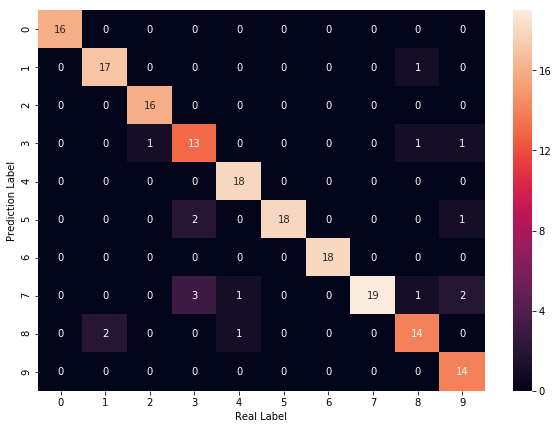

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 18., 16., 16., 18., 21., 18., 26., 17., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:137 index:[5] real:5
#1 min_error:161 index:[3] real:2
#2 min_error:149 index:[8] real:8
#3 min_error:36 index:[0] real:0
#4 min_error:136 index:[1] real:1
#5 min_error:110 index:[7] real:7
#6 min_error:70 index:[6] real:6
#7 min_error:108 index:[3] real:3
#8 min_error:80 index:[2] real:2
#9 min_error:140 index:[1] real:1
#10 min_error:165 index:[7] real:7
#11 min_error:165 index:[7] real:4
#12 min_error:90 index:[6] real:6
#13 min_error:119 index:[3] real:3
#14 min_error:129 index:[1] real:1
#15 min_error:157 index:[3] real:3
#16 min_error:161 index:[7] real:9
#17 min_error:123 index:[1] real:1
#18 min_error:157 index:[7] real:7
#19 min_error:64 index:[6] real:6
#20 min_error:148 index:[8] real:8
#21 min_error:82 index:[4] real:4
#22 min_error:106 index:[3] real:3
#23 min_error:140 index:[1] real:1
#24 min_error:87 index:[4] real:4
#25 min_error:60 index:[0] real:0
#26 min_error:105 index:[5] real:5
#27 min_error:97 index:[3] real:3
#28 min_error:117 index:[6] real:6
#29 

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8756 Total connections::8751


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9059987631416203
Avg Base Learner:0.7820369919894661
